# Assignment 2 - Logistic Regression
> **FULL MARKS = 10**

In this assignment, you are going to implement your own logistic Regression function. Please notice **no** library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 

***Initialization***

*No more library allowed*

In [1]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [2]:
x, y = load_iris(return_X_y=True)

In [3]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

**Visualize data**
___________

In [4]:
# draw raw data
def draw_data(x,y):
    
    #########################################################################
    # Full Mark: 1                                                          #    
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    fullDataSet = np.c_[x,y]
    Setosa = fullDataSet[np.where(fullDataSet[:,2] == 0)]
    Versicolor = fullDataSet[np.where(fullDataSet[:,2] == 1)]
    plt.title("Iris")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal Width")
    plt.scatter(Setosa[:,0],Setosa[:,1],label = "Setosa")
    plt.scatter(Versicolor[:,0],Versicolor[:,1],label = "Versicolor")
    plt.legend()
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

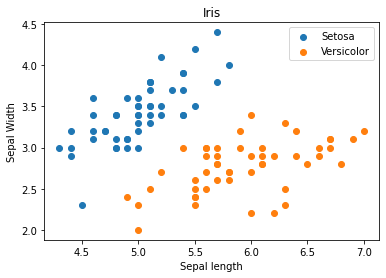

In [5]:
draw_data(x,y)

**Sigmoid function**
________________

In [6]:
# please do not modify this cell
x = np.concatenate((np.array([np.ones(len(y))]).T, x), axis=1)
theta = np.zeros(x.shape[1])

**You can decide by yourselves whether to split the dataset to training and testing. The training and testing datasets spliting is not a part of the assignment 2 as you have done that in assignmnet 1. Without spliting, you can just report the accuracy on training dataset. **

In [7]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input theta and X
    #########################################################################
    s = np.dot(X,theta)
    s = 1 / (1 + np.exp(-s))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return s

**Cost function**
____________

In [8]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################
    m = X.shape[0]
    co = -(1 / m) * np.sum(y * np.log(sigmoid(theta, X)) + (1 - y) * np.log(
            1 - sigmoid(theta, X)))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return co

**Calculate gradients**
________________

In [9]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    m = X.shape[0]
    grad = (1 / m) * np.dot(X.T, sigmoid(theta,X) - y)
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad

**Predicting**
________________

In [10]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    predict_labels = sigmoid(theta, X)
    for i,j in enumerate(predict_labels):
      if j < .5:
        predict_labels[i] = 0
      else:
        predict_labels[i] = 1
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return predict_labels

**Calculate accuracy**
________________

In [11]:
# calculate accuracy
def accurate(predictions, y):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    accuracy_score = np.mean(predictions == y) * 100
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return accuracy_score

**Calling functions**
________

In [12]:
# please do not modify this cell
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
final_theta = result[0]
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 0.051716623687215364
accuracy is 99.0


<ipython-input-8-3bfb75e6caad>:9: RuntimeWarning: divide by zero encountered in log
  co = -(1 / m) * np.sum(y * np.log(sigmoid(theta, X)) + (1 - y) * np.log(
<ipython-input-8-3bfb75e6caad>:9: RuntimeWarning: invalid value encountered in multiply
  co = -(1 / m) * np.sum(y * np.log(sigmoid(theta, X)) + (1 - y) * np.log(


**Decsion boudary** 

In [13]:
# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. plot the decision boudary on the raw data                          #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    x_values = [np.min(x[:, 0]-1), np.max(x[:, 1]+3)]
    y_values = - (final_theta[0] + np.dot(final_theta[1], x_values)) / final_theta[2]
    plt.clf()
    fullDataSet = np.c_[x,y]
    Setosa = fullDataSet[np.where(fullDataSet[:,2] == 0)]
    Versicolor = fullDataSet[np.where(fullDataSet[:,2] == 1)]
    plt.title("Iris")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal Width")
    plt.scatter(Setosa[:,0],Setosa[:,1],label = "Setosa")
    plt.scatter(Versicolor[:,0],Versicolor[:,1],label = "Versicolor")
    plt.plot(x_values, y_values,label='Decision Boundary')
    plt.legend()

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

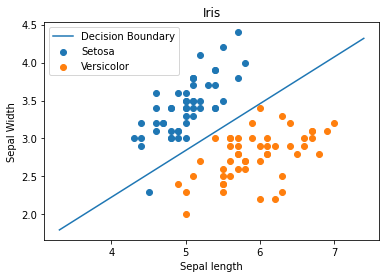

In [14]:
# Redifining x and y since the values have been changed
x, y = load_iris(return_X_y=True)
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]
draw_decision_boudary(final_theta,x,y)